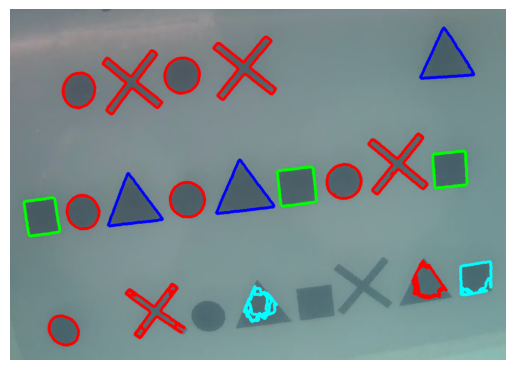

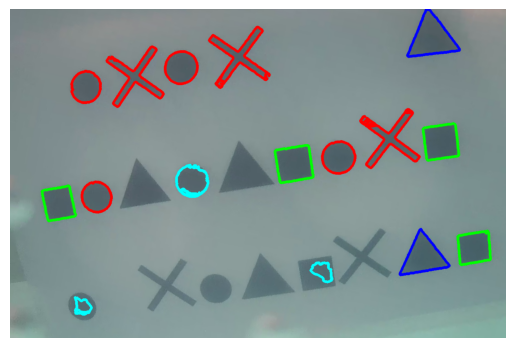

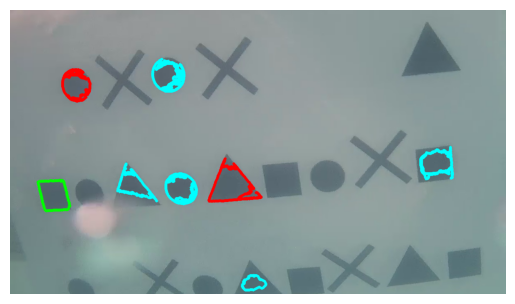

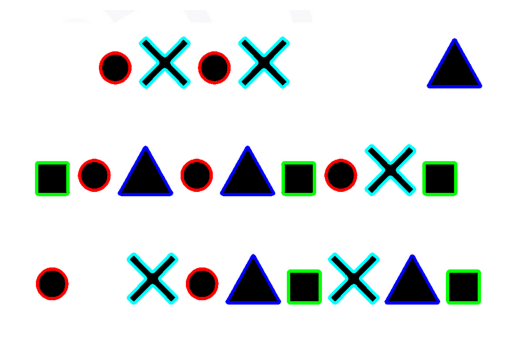

KeyboardInterrupt: 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_img(img):
    
    sharp_kernel = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]])
    median = cv2.medianBlur(img, 7)
    gauss = cv2.GaussianBlur(median, (3, 3), 2)
    sharpened_frame = cv2.filter2D(gauss, -1, sharp_kernel)
    return sharpened_frame

def detect_contours(img, contours):
   
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        num_vertices = len(approx)

        
        if cv2.contourArea(contour) < 1000:
            continue

        
        if num_vertices == 3:
            cv2.drawContours(img, [contour], -1, (255, 0, 0), 5)  
        elif num_vertices == 4:
            cv2.drawContours(img, [contour], -1, (0, 255, 0), 5)  
        elif num_vertices == 8:
            cv2.drawContours(img, [contour], -1, (0, 0, 255), 5) 
        elif num_vertices > 8:
            cv2.drawContours(img, [contour], -1, (255, 255, 0), 5)  

def main():
    
    
    image_names = ["frame1.png", "frame2.png","frame3.png","original.png","real.jpg","real2.jpg","real3.jpg","real4.png"]  # List your actual image filenames here

    for image_name in image_names:
        
        img = cv2.imread(image_name)

        if img is None:
            print(f"Error: Unable to read image '{image_name}'")
            continue

        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        processed_img = process_img(gray)

       
        thresh = cv2.threshold(processed_img, 100, 200, cv2.THRESH_BINARY_INV)[1]
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        
        detect_contours(img, contours)

        
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

if __name__ == "__main__":
    main()
